#Desafío e investigación número 1 INF138

**Declaración Ética:** Los autores Cristóbal Lobos y Javier Valladares declaran que el trabajo presentado acá es original y basado en las reglas estipuladas, y las partes del código que son obra de otros autores se encuentran referencias respectivamente.

Aporte por persona:

Javier Valladares: 

-Programó la investigación del primer y segundo dataset, el procesador de texto, y desarrolló un procesamiento base (es decir, obtuvo primero una predicción y desarrolló el preprocesamiento de los datos para elegir los parametros para el modelo (los gráficos de distribución de palabras), además, tuvo como idea un primer acercamiento utilizando multinomial naive bayes. En particular, el primer acercamiento fue solamente utilizando texto y no los valores numéricos de las imagenes.

Cristóbal Lobos:

-Programó la investigación del dataset sintético, terminó la investigación de los dataset presentando las curvas PR y ROC en un mismo grafico y juntando los resultados entregados. Para el desafío, tuvo otro acercamiento al procesamiento de texto para entrenar el modelo, además de agregar los datos numéricos a los datos de entrenamiento. Además, agregó el regresor logístico como modelo.

Entre ambos hicieron el estudio para quedarse con cual realizar la predicción con los datos test en base a las métricas que ambos programaron.

## Video explicativo

link: https://drive.google.com/file/d/1vx1lrD-aCj4Nozwy3jPEGFkaM4nQ_WQv/view?usp=sharing

#Tema de investigación
Tema 15:  **Métricas de Evaluación:** El área bajo la curva ROC es proporcional al área bajo la curva PR y por lo tanto un clasificador que supera a otro en términos de AUROC lo hace también en términos de AUPR.

#Desarrollo de la investigación

Se presentan tres datasets, donde dos son reales, el del Iris que presenta tipos de plantas iris con atributos y hay que clasificar de que tipo es cada planta. 

El segundo "Glass" presenta datos sobre siete tipos de vidrio, donde se clasifica en donde se utiliza el vidrio presentado, llamese si se utiliza en construcción, vehículos, etc.

El tercer dataset un dataset sintético.



## Papers

La investigación está basada en el paper "The Relationship Between Precision-Recall and ROC Curves" (https://www.biostat.wisc.edu/~page/rocpr.pdf). 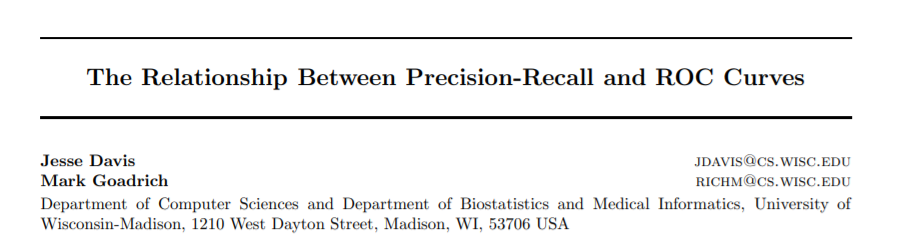

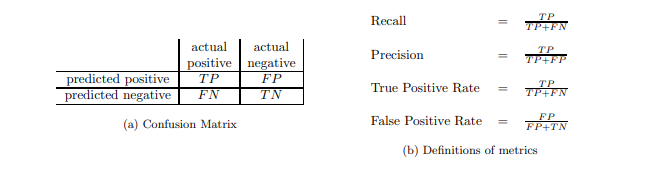

Comparación de una curva ROC y una curva PR.

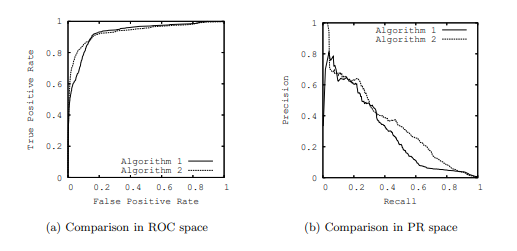

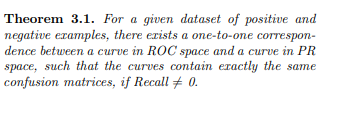

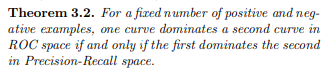

La idea es presentar los valores de AUROC y PR y ver la relación entre ellos, de acuerdo con lo mencionado en el paper, si un modelo supera en términos de AUROC a otro también debe hacerlo en términos de PR si es que una curva domina a la otra en todos los puntos. 

Cabe destacar que si no lo hace en todos los puntos, puede ocurrir que no se cumpla lo anterior, es decir, puede ocurrir que un modelo supere a otro en terminos de AUROC pero no en PR.

Se trabajó con dos modelos (Regresión Logística y Multinomial Naive Bayes) para ver la relación mencionada. 

## Primer Dataset (Iris)

###Lectura de datos

In [ ]:
#Importamos las librerias

from google.colab import drive
import os
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
'''drive.mount('/content/drive')

path = '/content/drive/MyDrive/Dataset/' 

data = pd.read_csv(path + 'Iris.csv')'''

data = pd.read_csv(os.path.join('iris.csv'))

Mounted at /content/drive


In [ ]:
data['Species'].unique() #Imprimimos las clases de nuestro dataset

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Asignamos el valor 1 a la clase que queremos clasificar en particular

data.loc[data['Species'] == 'Iris-setosa', 'Species'] = 1
data.loc[data['Species'] == 'Iris-versicolor', 'Species'] = 1
data.loc[data['Species'] == 'Iris-virginica', 'Species'] = 0 

In [ ]:
#Cambiamos el nombre de nuestra columna target y eliminamos la columna ID del dataset

data = data.rename(columns ={'Species':'Target'})
data = data.drop(['Id'], axis=1)

In [ ]:
data #Imprimimos el dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


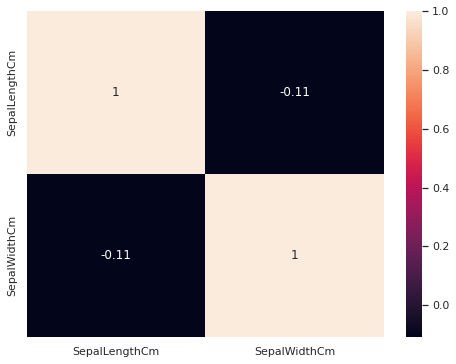

In [ ]:
#Matriz de correlacion
corr_df = data[['SepalLengthCm', 'SepalWidthCm']].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

###Creacion de datos de entrenamiento

In [ ]:
#Definimos la matriz caracteristicas y el target

X = data[['SepalLengthCm', 'SepalWidthCm']]
Y = data['Target']
Y = Y.astype('int')

# Separamos el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2)

In [ ]:
# Imprimimos la cantidad de datos que tienen los datos de entrenamiento y test

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  150
numero de filas train set     :  105
numero de filas test set      :  45


###Comparacion de AUC y ROC

####Primer modelo (regresion logistica)

In [ ]:
#Importamos el modelo de regresion logistica y lo ajustamos

#GridSearchCV recibe una lista de hiperparametros para el modelo y elige los mejores para el acso
#Esto lo utilizamos en la mayoría de los modelos trabajados tanto en el desafío como en la investigación

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid={"C":np.linspace(-3,0.1,10), "penalty":["l1","l2"], "dual":[True,False],
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "multi_class":['auto', 'ovr', 'multinomial'], "max_iter":[100,150,200]}

rlog= GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 


#Ajustamos nuestro modelo

rlog.fit(X_train, Y_train) 

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 8859 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:   13.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([-3.        , -2.65555556, -2.31111111, -1.96666667, -1.62222222,
       -1.27777778, -0.93333333, -0.58888889, -0.24444444,  0.1       ]),
                         'dual': [True, False], 'max_iter': [100, 150, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         '

#### Segundo modelo (Multinomial Bayes)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Importamos Multinomial Naive Bayes y lo ajustamos 
param_grid={"alpha":np.linspace(-3,0.1,10)}
multi_nb= GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3,n_jobs=-1)
multi_nb.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([-3.        , -2.65555556, -2.31111111, -1.96666667, -1.62222222,
       -1.27777778, -0.93333333, -0.58888889, -0.24444444,  0.1       ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

### Tercer modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=8,random_state=42) 

clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

###Resultados

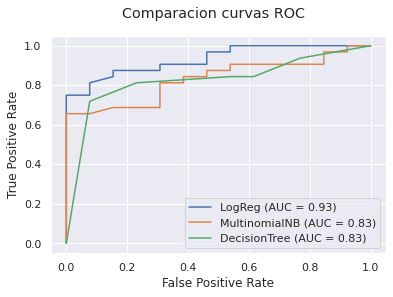

In [ ]:
#Graficamos las curvas ROC para cada modelo

from sklearn.metrics import plot_roc_curve

fig = plot_roc_curve(rlog, X_test,Y_test, name = 'LogReg') #Regresor Logistico
fig = plot_roc_curve(multi_nb, X_test, Y_test, name = 'MultinomialNB', ax = fig.ax_) #Multinomial Naive Bayes
fig = plot_roc_curve(clf, X_test, Y_test, name = 'DecisionTree', ax = fig.ax_) #Multinomial Naive Bayes

fig.figure_.suptitle("Comparacion curvas ROC")
plt.show() 

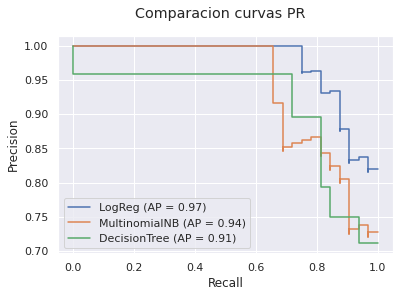

In [ ]:
#Graficamos las curvas PR

from sklearn.metrics import plot_precision_recall_curve 

fig = plot_precision_recall_curve(rlog, X_test,Y_test, name = 'LogReg') #Regresor Logistico
fig = plot_precision_recall_curve(multi_nb, X_test, Y_test, name = 'MultinomialNB', ax = fig.ax_) #Multinomial Naive Bayes
fig = plot_precision_recall_curve(clf, X_test, Y_test, name = 'DecisionTree', ax = fig.ax_) #Multinomial Naive Bayes

fig.figure_.suptitle("Comparacion curvas PR")
plt.show()

## Dataset Glass

###Lectura y procesamiento de datos

In [ ]:
'''drive.mount('/content/drive')

path = '/content/drive/MyDrive/Dataset/' 

data = pd.read_csv(path + 'glass.csv')'''

data = pd.read_csv(os.path.join('glass.csv'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data #Vemos el dataset, cada columna corresponde a elementos que forman al vidrio, y el tipo es un entero del 1 al 7

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
  data['Type'].unique() #Tipos totales de vidrio en el dataset

array([1, 2, 3, 5, 6, 7])

In [ ]:
#Asignamos el valor 1 a la clase que queremos clasificar en particular, en este caso, la 7


data.loc[data['Type'] != 7, 'Type'] = 0
data.loc[data['Type'] == 7, 'Type'] = 1

In [ ]:
columnas = list(data.columns) #copia del dataframe

In [ ]:
columnas.remove('Type') #sacamos la columna de tipos de vidrio

In [ ]:
columnas #vemos que solo quedamos con los elementos

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

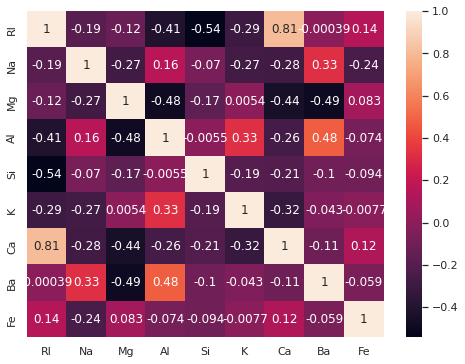

In [ ]:
#Matriz de correlacion

corr_df = data[columnas].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

###Creacion datos de entrenamiento

In [ ]:
#Datos para entrenar

X = data[columnas]
Y = data['Type']
Y = Y.astype('int')

# Separamos el dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 2)

In [ ]:
# Imprimimos la cantidad de datos que tiene cada grupo

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  214
numero de filas train set     :  160
numero de filas test set      :  54


###Comparacion de AUC y ROC

####Primer modelo (regresión logística)

In [ ]:
#Importamos el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid={"C":np.linspace(-3,0.1,10), "penalty":["l1","l2"], "dual":[True,False],
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "multi_class":['auto', 'ovr', 'multinomial'], "max_iter":[100,150,200]}

rlog= GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 


#Ajustamos nuestro modelo

rlog.fit(X_train, Y_train) 

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:   13.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([-3.        , -2.65555556, -2.31111111, -1.96666667, -1.62222222,
       -1.27777778, -0.93333333, -0.58888889, -0.24444444,  0.1       ]),
                         'dual': [True, False], 'max_iter': [100, 150, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         '

####Segundo modelo (Multinomial Naive Bayes)

In [ ]:
#Importamos Multinomial Naive Bayes y lo ajustamos
from sklearn.naive_bayes import MultinomialNB

param_grid={"alpha":np.linspace(-3,0.1,10)}
multi_nb = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3,n_jobs=-1)
multi_nb.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([-3.        , -2.65555556, -2.31111111, -1.96666667, -1.62222222,
       -1.27777778, -0.93333333, -0.58888889, -0.24444444,  0.1       ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

### Tercer modelo (Radom forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=42)

clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

###Resultados

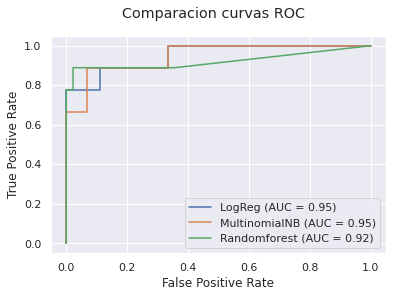

In [ ]:
#Graficamos las curvas ROC para cada modelo

from sklearn.metrics import plot_roc_curve

fig = plot_roc_curve(rlog, X_test,Y_test, name = 'LogReg') #Regresor Logistico
fig = plot_roc_curve(multi_nb, X_test, Y_test, name = 'MultinomialNB', ax = fig.ax_) #Multinomial Naive Bayes
fig = plot_roc_curve(clf, X_test, Y_test, name = 'Randomforest', ax = fig.ax_) #Multinomial Naive Bayes

fig.figure_.suptitle("Comparacion curvas ROC")
plt.show() 

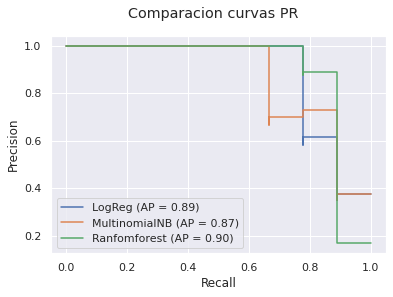

In [ ]:
#Graficamos las curvas PR

from sklearn.metrics import plot_precision_recall_curve 

fig = plot_precision_recall_curve(rlog, X_test,Y_test, name = 'LogReg') #Regresor Logistico
fig = plot_precision_recall_curve(multi_nb, X_test, Y_test, name = 'MultinomialNB', ax = fig.ax_) #Multinomial Naive Bayes
fig = plot_precision_recall_curve(clf, X_test, Y_test, name = 'Ranfomforest', ax = fig.ax_) #Multinomial Naive Bayes

fig.figure_.suptitle("Comparacion curvas PR")
plt.show()

##Dataset Sintetico

###Creación de dataset sintético y de entrenamiento

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler


#Creacion de datos sinteticos para clasificacion, son 1000 ejemplos, con 20 features, no se repite ninguno y no hay redundancia
#Corresponde a una clasificación binaria por default
X,Y = make_classification(n_samples=1000,n_features=20,n_repeated=0,n_redundant=0, random_state=42)
scaler = MinMaxScaler(feature_range=(1, 10)) #Escalamos todos los datos a que sean positivos entre 1 y 10
X = scaler.fit_transform(X)
           


In [ ]:
#Creacion datos de entrenamiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2)

In [ ]:
# Imprimimos la cantidad de datos que tienen los datos de entrenamiento y test

print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  1000
numero de filas train set     :  700
numero de filas test set      :  300


###Primer modelo (Multinomial Naive Bayes)

In [ ]:
#Importamos y ajustamos Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

param_grid={"alpha":np.linspace(-3,0.1,10)}
multi_nb = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3,n_jobs=-1)
multi_nb.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([-3.        , -2.65555556, -2.31111111, -1.96666667, -1.62222222,
       -1.27777778, -0.93333333, -0.58888889, -0.24444444,  0.1       ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

### Segundo modelo (Regresión Logística)

In [ ]:
#Importamos el modelo de regresion logistica

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid={"C":np.linspace(-3,0.1,10), "penalty":["l1","l2"], "dual":[True,False],
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "multi_class":['auto', 'ovr', 'multinomial'], "max_iter":[100,150,200]}

rlog= GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 


#Ajustamos nuestro modelo

rlog.fit(X_train, Y_train) 

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:   10.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([-3.        , -2.65555556, -2.31111111, -1.96666667, -1.62222222,
       -1.27777778, -0.93333333, -0.58888889, -0.24444444,  0.1       ]),
                         'dual': [True, False], 'max_iter': [100, 150, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         '

### Tercer modelo (DecisionTreeClassifier)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=8,random_state=42) 

clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

###Resultados

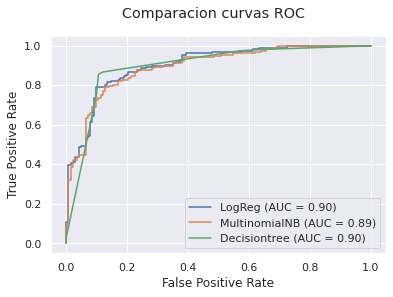

In [ ]:
#Graficamos las curvas ROC para cada modelo

from sklearn.metrics import plot_roc_curve

fig = plot_roc_curve(rlog, X_test,Y_test, name = 'LogReg') #Regresor Logistico
fig = plot_roc_curve(multi_nb, X_test, Y_test, name = 'MultinomialNB', ax = fig.ax_) #Multinomial Naive Bayes
fig = plot_roc_curve(clf, X_test, Y_test, name = 'Decisiontree', ax = fig.ax_) #Multinomial Naive Bayes

fig.figure_.suptitle("Comparacion curvas ROC")
plt.show() 

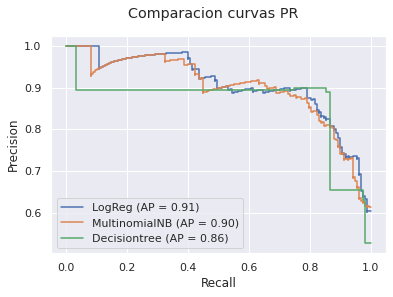

In [ ]:
#Graficamos las curvas PR

from sklearn.metrics import plot_precision_recall_curve 

fig = plot_precision_recall_curve(rlog, X_test,Y_test, name = 'LogReg') #Regresor Logistico
fig = plot_precision_recall_curve(multi_nb, X_test, Y_test, name = 'MultinomialNB', ax = fig.ax_) #Multinomial Naive Bayes
fig = plot_precision_recall_curve(clf, X_test, Y_test, name = 'Decisiontree', ax = fig.ax_) #Multinomial Naive Bayes

fig.figure_.suptitle("Comparacion curvas PR")
plt.show()

##Conclusión:

Logramos ver que se cumple el teorema solo si la curva de un modelo domina completamente a la de otro modelo, tanto para la curva ROC como la curva PR.

Sin embargo, como se puede observar en los dataset de glass (Multinomial vs Ramforest) y sintetico (Multinomial vs DecisionTree), si la dominancia no se cumple en todos los puntos, es decir, existen puntos en donde se invierten las curvas, el teorema no se cumple. Por esta razón, es importante la hipótesis de que la dominancia sea en todos los puntos.

Finalmente, podemos decir que la hipótesis de investigación se cumple bajo las condiciones del teorema.


# Desafio Trovapezzi
link de la competencia: https://www.kaggle.com/c/inf398-2021-taller1/overview

Parte de este código fue sacado de la ayudantia 3 https://drive.google.com/file/d/1XgB00ljz0nmjD_RAx-ltUeft4gq7Rjhe/view (la parte del procesamiento de texto)

In [ ]:
# hacer la conexión a Google Drive
'''
colab_flag = True
if (colab_flag):
    drive.mount('/content/drive')

colab_flag = True
path = '/content/drive/MyDrive/Dataset' 
if (colab_flag):
    !echo $path
    !unzip $path/ferramenta_competition_train.zip'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Dataset
Archive:  /content/drive/MyDrive/Dataset/ferramenta_competition_train.zip
replace ferramenta_competition_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ferramenta_competition_train.csv  


##Procesamiento de datos

In [ ]:
#Leemos los datos
'''
if (colab_flag):
    data = pd.read_csv("ferramenta_competition_train.csv", encoding='latin-1')'''

data = pd.read_csv(os.path.join('ferramenta_competition_train.csv'))

In [ ]:
#Vemos el dataframe
data

,image,title,description,class,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,...,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255
0,181587231.jpg,record irwin irwin record 96 morsa da banco pe...,irwin record 96 morsa da banco per tubi 3 152 mm,_@morsetto_strettoio_,0.000000,0.000000,0.000000,0.254326,0.000000,0.247400,0.000000,0.039258,0.578160,0.0,0.00000,0.000000,0.000000,0.0,0.000000,1.196226,0.0,0.347120,0.893756,0.107661,0.120584,0.619810,0.775081,0.237588,0.480812,0.092190,0.585013,0.260801,0.0,0.051128,0.408755,0.0,0.008246,0.000000,0.895943,0.000000,...,0.180205,0.292480,0.0,0.000000,0.377168,0.495082,0.000000,0.0,0.819566,0.587949,0.306579,0.625850,0.0,0.000000,0.892972,0.457109,0.877249,0.000000,0.0,0.112500,0.000000,0.000000,0.682221,0.604566,0.000000,0.031261,0.160201,0.516720,0.667781,0.128813,0.237102,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.063287,0.000000
1,200447756.jpg,italchimica base tintometro x smalto fer plenu...,sistema tintometrico base per smalto antiruggi...,_@vernice_,0.420585,0.000000,0.000000,0.454027,0.000000,0.796165,0.015496,0.000000,0.122843,0.0,0.00000,0.232738,0.230362,0.0,0.000000,0.573399,0.0,0.375044,1.059744,0.187541,0.549539,0.374479,0.117968,0.003436,0.687855,0.000000,0.324851,0.130692,0.0,0.775700,0.380714,0.0,0.000000,0.000000,1.012925,0.519390,...,0.085027,0.087495,0.0,0.000000,0.197663,0.649096,0.000000,0.0,0.299882,0.397917,0.360671,1.054911,0.0,0.000000,0.678310,0.257860,0.551309,0.193663,0.0,0.504867,0.000000,0.000000,0.542428,0.000000,0.217511,0.000000,0.090439,0.488979,0.755477,0.505257,0.586435,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,160784717.jpg,maurer cerniera per mobili perno fisso art 500...,confezione 4 pzmisura 1 3 4misura 2 20x20 mm. ...,_@cerniera_bandella_,0.105055,0.512814,0.000000,0.309017,0.000000,0.519669,0.000000,0.000000,0.443095,0.0,0.02043,0.000000,0.000000,0.0,0.000000,0.328891,0.0,0.346205,1.448922,0.000000,0.332051,0.132104,0.285849,0.637295,0.709344,0.000000,0.595629,0.000000,0.0,0.141472,0.000000,0.0,0.000000,0.000000,0.528764,0.160127,...,0.022388,0.000000,0.0,0.000000,0.733194,0.814695,0.000000,0.0,0.576185,0.719151,0.477687,1.019373,0.0,0.000000,0.505605,0.204111,1.078165,0.000000,0.0,0.000000,0.213909,0.110369,0.834945,0.000000,0.206743,0.136458,0.000000,0.132498,0.356487,0.419246,0.565308,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.617254,0.000000
3,115047083.jpg,sanifri 470018043 connettori ad angolo zincati...,sanifri 470018043 connettori ad angolo zincati...,_@staffa_squadretta_,0.052270,0.000000,0.000000,0.006339,0.000000,0.204171,0.434331,0.000000,0.439615,0.0,0.00000,0.039426,0.000000,0.0,0.275153,0.490338,0.0,0.124367,1.412030,0.011064,0.336450,0.192238,0.349319,0.404078,0.498563,0.077804,0.906431,0.507788,0.0,0.461764,0.000000,0.0,0.000000,0.000000,1.180548,0.000000,...,0.000000,0.171111,0.0,0.000000,0.595918,0.545273,0.000000,0.0,0.342300,0.901514,0.653951,0.546019,0.0,0.092263,0.824342,0.329975,0.674738,0.000000,0.0,0.174564,0.227789,0.000000,0.386442,0.000000,0.000000,0.148257,0.169733,0.438215,0.000000,0.000000,0.000000,0.223212,0.0,0.0,0.000000,0.0,0.000000,0.0,0.019491,0.000000
4,171654232.jpg,weller 2020 saldatore elettrico per ferro 20 w...,weller 2020 saldatore elettrico per ferro 20 w...,_@accessori_saldatore_,0.481601,0.500977,0.133263,0.558505,0.042294,0.000000,0.049805,0.000000,0.284956,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.077343,0.0,0.386074,1.529590,0.121066,0.236316,0.000000,0.591344,0.259437,0.356270,0.000000,0.523772,0.169259,0.0,0.000000,0.000000,0.0,0.152869,0.085487,0.952200,0.244196,...,0.098452,0.000000,0.0,0.153734,0.704994,1.118472,0.084447,0.0,0.573938,0.456719,0.000000,0.175883,0.0,0.000000,0.461596,0.328040,0.686096,0.000000,0.0,0.038806,0.00

In [ ]:
# Separamos el dataset para entrenamiento, se usa un 25% del conjunto total de datos para testeo

X_train, X_test, Y_train, Y_test = train_test_split(data.loc[0:, data.columns != 'class'], data['class'], test_size=0.25, random_state = 3)

X_train.head() #verificacion de que el conjunto de train no contiene a la columna 'class'

,image,title,description,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,...,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255
671,201004466.jpg,lancia curvabile saldatura acetilene frover fr...,lancia curvabile acetilene frover fro lancia c...,0.436675,0.407890,0.036755,0.730402,0.000000,0.699882,0.229215,0.000000,0.754754,0.0,0.000000,0.000000,0.0,0.0,0.320778,0.000000,0.0,0.421752,1.598848,0.000000,0.100992,0.776215,0.496247,0.247053,0.378656,0.000000,0.401371,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.045976,0.899166,0.391329,0.000000,...,0.463886,0.000000,0.0,0.0,0.471202,1.145516,0.000000,0.0,0.675847,0.413774,0.000000,0.518499,0.000000,0.0,0.644126,0.087742,1.368457,0.035094,0.0,0.000000,0.000000,0.000000,0.000000,0.271272,0.067182,0.000000,0.049434,0.541007,0.595275,0.000000,0.464401,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.080668
2088,164203473.jpg,secotec cerniera secotec arrotolato con perno ...,cerniera secotec arrotolato con perno rivettat...,0.206149,0.410982,0.000000,0.769373,0.000000,0.659514,0.126797,0.000000,0.569278,0.0,0.000000,0.000000,0.0,0.0,0.085559,0.432235,0.0,0.260692,1.222378,0.000000,0.432989,0.373136,0.673571,0.317714,0.431389,0.000000,0.695849,0.000000,0.0,0.113281,0.165983,0.0,0.00000,0.000000,0.860013,0.000000,0.000000,...,0.395731,0.000000,0.0,0.0,0.561054,1.031228,0.000000,0.0,0.659079,0.867097,0.463472,0.763917,0.000000,0.0,1.139667,0.314742,0.916411,0.000000,0.0,0.000000,0.000000,0.177589,0.683181,0.513670,0.000000,0.045847,0.000000,0.211835,0.394584,0.000000,0.435177,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.099231,0.000000
1177,184749055.jpg,ks tools 670.0191 estrattore universale a 3 br...,numero di tariffa doganale 8205 5980 00 ean co...,0.556487,0.000000,0.000000,1.105084,0.075114,0.000000,0.000000,0.000000,1.352582,0.0,0.000000,0.000000,0.0,0.0,0.265971,1.057385,0.0,0.000000,0.624255,0.298778,0.000000,0.000000,0.959176,0.447412,0.171871,0.645796,0.629379,0.649239,0.0,0.000000,0.103937,0.0,0.00000,0.000000,1.022488,0.284350,0.399716,...,0.435776,0.132727,0.0,0.0,0.227938,0.799389,0.238383,0.0,0.856833,0.676562,0.885412,0.706631,0.047832,0.0,0.570589,0.965184,1.302210,0.000000,0.0,0.000000,0.000000,0.000000,0.477767,0.384478,0.089505,0.103799,0.263786,0.312335,0.883922,0.000000,0.015927,0.0,0.0,0.0,0.0,0.0,0.006232,0.0,0.000000,0.000000
1707,197135754.jpg,valex 1451581 morsa da banco girevole mm 60,morsa da banco girevole mm 60 tipologiamorsa d...,0.152153,0.347141,0.000000,0.385661,0.000000,0.013773,0.139940,0.276345,0.172469,0.0,0.030365,0.000000,0.0,0.0,0.048508,0.394874,0.0,0.518035,1.296764,0.117647,0.204993,0.067442,0.491402,0.000000,0.115747,0.000000,0.605567,0.367906,0.0,0.119748,0.384765,0.0,0.06424,0.000000,0.965259,0.103617,0.000000,...,0.196891,0.000000,0.0,0.0,0.243660,1.115249,0.000000,0.0,0.285138,0.746166,0.000000,0.612614,0.000000,0.0,0.981390,0.233234,1.566719,0.042815,0.0,0.338597,0.257118,0.000000,0.674934,0.582912,0.191749,0.000000,0.000000,0.312602,0.403374,0.189433,0.399670,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.580985,0.000000
1635,196174826.jpg,rst r.s.t. rte88a cazzuola 1 2 pollici,r.s.t. rte88a cazzuola 1 2 pollici,0.148622,0.288598,0.000000,0.511348,0.000000,0.314616,0.173658,0.000000,0.478272,0.0,0.000000,0.121799,0.0,0.0,0.127751,0.521081,0.0,0.458113,1.607816,0.000000,0.232930,0.529723,0.564377,0.405757,0.063077,0.000000,0.425533,0.000000,0.0,0.049828,0.000000,0.0,0.00000,0.232196,0.626978,0.267399,0.000000,...,0.224044,0.000000,0.0,0.0,0.673795,1.153249,0.000000,0.0,0.517359,0.480985,0.000000,0.444384,0.000000,0.0,0.319544,0.139129,1.208336,0.271004,0.0,0.000000,0.000000,0.000000,0.462913,0.252804,0.334547,0.000000,0.069886,0.395848,0.601439,0.000000,0.208794,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.396425,0.012024


In [ ]:
# Imprimimos la cantidad de datos que tiene cada grupo
print('Separando informacion:\n')
print('numero de filas data original : ',len(data))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  2524
numero de filas train set     :  1893
numero de filas test set      :  631


In [ ]:
# Revisamos cuantos datos faltan por columna
print("Número de datos NaN por feature: \n")
print(data.isnull().sum(axis = 0))

Número de datos NaN por feature: 

image          0
title          0
description    0
class          0
f0             0
              ..
f251           0
f252           0
f253           0
f254           0
f255           0
Length: 260, dtype: int64


In [ ]:
data.shape #dimensiones del conjunto de datos

(2524, 260)

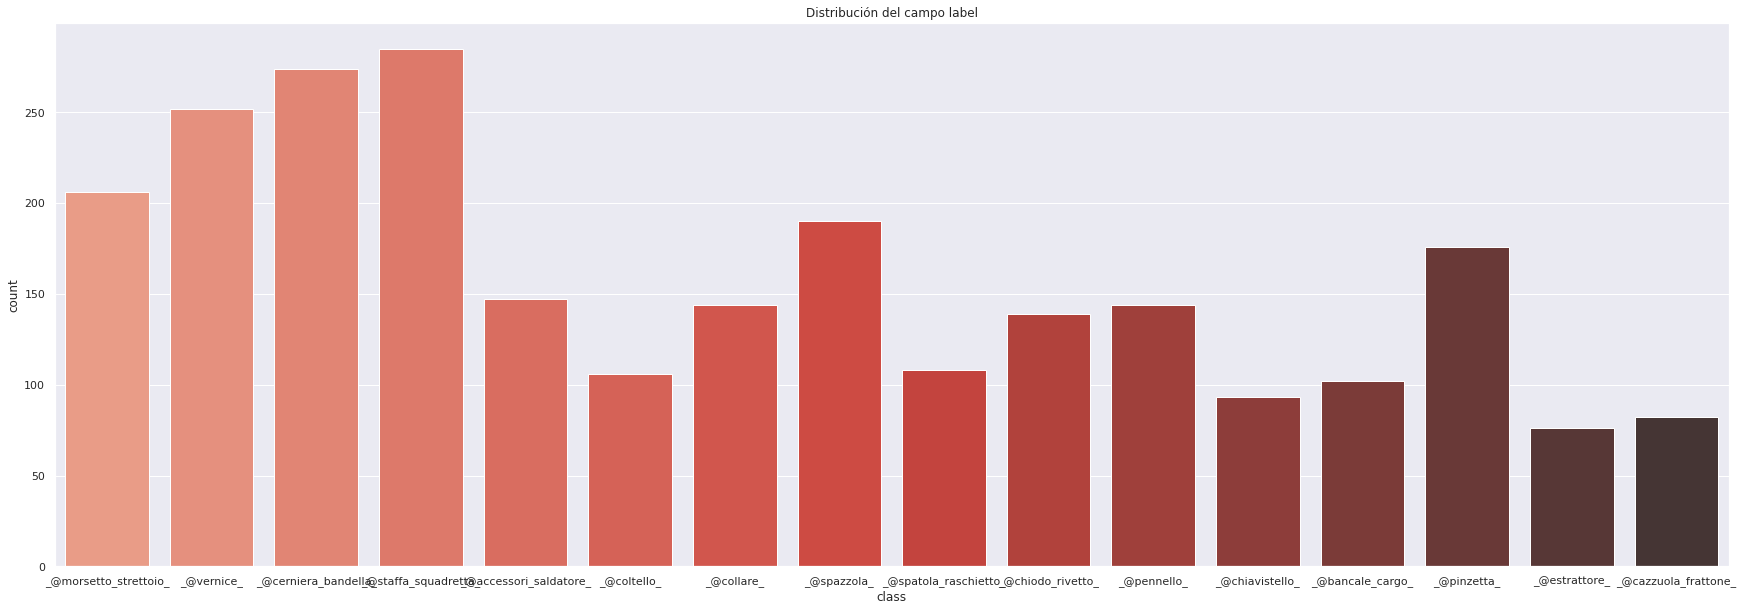

In [ ]:
#Distribucion campo label
fig, ax = plt.subplots(figsize=(30,10),nrows=1)
sns.countplot(x="class", data=data, palette="Reds_d", ax = ax)
ax.set_title('Distribución del campo label')
plt.show()

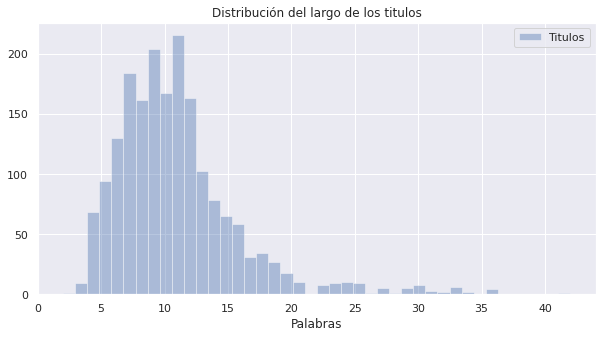

In [ ]:
#Grafico para ver la distribución de los largos de los titulos
len_ = []

for td in X_train['title']: 
    len_.append(len(td.lower().split()))

fig, ax = plt.subplots(figsize=(10,5),nrows=1)

sns.distplot(len_, hist=True, kde=False, norm_hist=False, label='Titulos',ax=ax)
ax.set_title('Distribución del largo de los titulos')
ax.legend()
ax.set(xlabel='Palabras')


plt.show()


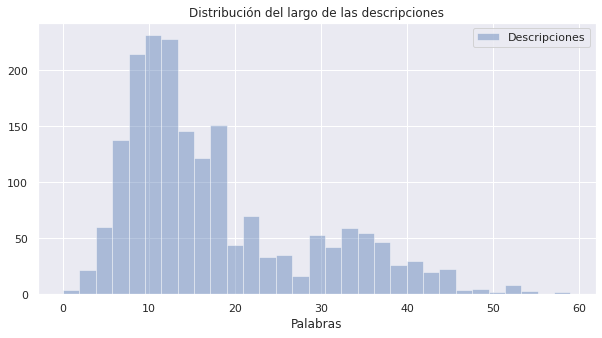

In [ ]:
#Grafico para ver la distribución de los largos de las descripciones
len_ = []

for td in X_train['description']: 
    len_.append(len(td.lower().split()))

fig, ax = plt.subplots(figsize=(10,5),nrows=1)

sns.distplot(len_, hist=True, kde=False, norm_hist=False, label='Descripciones',ax=ax)
ax.set_title('Distribución del largo de las descripciones')
ax.legend()
ax.set(xlabel='Palabras')


plt.show()


##Preprocesamiento de Texto

El código fue sacado de la ayudantia 3 https://drive.google.com/file/d/1XgB00ljz0nmjD_RAx-ltUeft4gq7Rjhe/view (la parte del procesamiento de texto)

In [ ]:
import nltk 
nltk.download('wordnet') # WordNet® es una base de datos de palabras en varios idiomas.
nltk.download('stopwords') 
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SnowballStemmer # para transformar palabras a a su raiz
from nltk.stem import WordNetLemmatizer # 

remove_stops_here = True
stemmer = SnowballStemmer("italian") 
tokenizer = TfidfVectorizer().build_tokenizer() 
#Tokenizer retorna una funcion que separa separa strings en una sucesion de tokens considerando caracteres unicode

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Esta funcion filtra las "stopwords" (conectores) en italiano de cada texto entregado
#retorna una lista con las palabras más importantes de cada texto

def my_pre_processer(text, debug = False):
    results = []
    if (debug):
        print("Tokenizer result: ", tokenizer(text))
    for token in tokenizer(text):
        clean_token = token.lower().strip('-').strip('_')
        if remove_stops_here and (clean_token in stopwords.words('italian')):
          continue
        token_pro = stemmer.stem(clean_token) #probamos stemming
        if len(token_pro) > 2 and not token_pro[0].isdigit(): #elimina palabra largo menor a 2
            results.append(token_pro)
    return results

In [ ]:
X_train['prepro_title'] = X_train['title'].apply(my_pre_processer) #preprocesamos los titulos
X_train['prepro_description'] = X_train['description'].apply(my_pre_processer) #preprocesamos las descripciones

In [ ]:
X_train[['title','description','prepro_title','prepro_description']]

,title,description,prepro_title,prepro_description
671,lancia curvabile saldatura acetilene frover fr...,lancia curvabile acetilene frover fro lancia c...,"[lanc, curvabil, saldatur, acetilen, frover, fro]","[lanc, curvabil, acetilen, frover, fro, lanc, ..."
2088,secotec cerniera secotec arrotolato con perno ...,cerniera secotec arrotolato con perno rivettat...,"[secotec, cernier, secotec, arrotol, pern, riv...","[cernier, secotec, arrotol, pern, rivett, prop..."
1177,ks tools 670.0191 estrattore universale a 3 br...,numero di tariffa doganale 8205 5980 00 ean co...,"[tools, estrattor, universal, bracc, volant]","[numer, tariff, doganal, ean, cod, eclass]"
1707,valex 1451581 morsa da banco girevole mm 60,morsa da banco girevole mm 60 tipologiamorsa d...,"[valex, mors, banc, girevol]","[mors, banc, girevol, tipologiamors, bancomisu..."
1635,rst r.s.t. rte88a cazzuola 1 2 pollici,r.s.t. rte88a cazzuola 1 2 pollici,"[rst, rte88, cazzuol, pollic]","[rte88, cazzuol, pollic]"
...,...,...,...,...
2304,sicutool spazzole rotative abrasive 7960p 16,grana null 16 spazzole rotative abrasive,"[sicutool, spazzol, rotat, abras]","[gran, null, spazzol, rotat, abras]"
968,l.m. monticelli squadretta alluminio l.m. mont...,squadretta alluminio l.m. monticelli 0486 mont...,"[monticell, squadrett, allumin, monticell, mon...","[squadrett, allumin, monticell, montebianc, sq..."
1667,bonum cazzuola a lingua di gatto inossidabile ...,bonum cazzuola a lingua di gatto inossidabile ...,"[bonum, cazzuol, lingu, gatt, inossid]","[bonum, cazzuol, lingu, gatt, inossid]"
1688,bulk hardware bh03862 63 mm con staffa ad ango...,bulk hardware bh03862 63 mm con staffa ad ango...,"[bulk, hardw, bh03862, staff, angol, placc, zinc]","[bulk, hardw, bh03862, staff, angol, placc, zinc]"


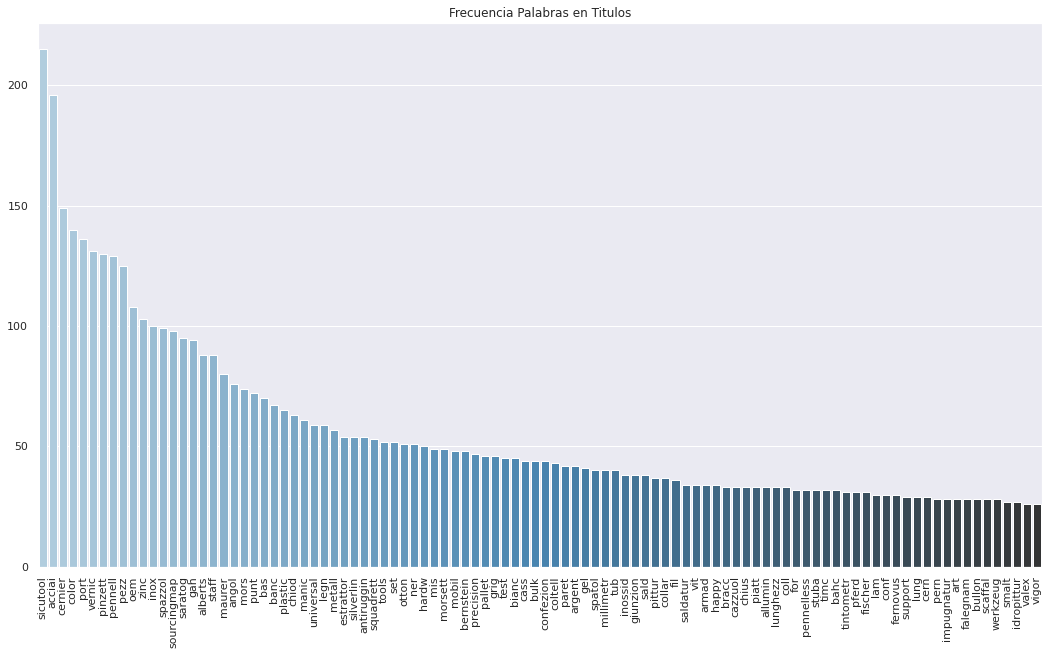

In [ ]:
#Graficamos la frecuencia de las palabras en los titulos ya preprocesados

all_tokens_titulo = [token for sublist in X_train.prepro_title for token in sublist]

from collections import Counter
freqs_titulo = Counter(all_tokens_titulo)

sorted_words_titulo  =  {k: v for k, v in sorted(freqs_titulo.items(), key=lambda item: item[1], reverse=True)}

top = 100
y = [float(y) for y in sorted_words_titulo.values()]
x = [x for x in sorted_words_titulo.keys()]

fig, ax = plt.subplots(figsize=(18,10),nrows=1)
p1 = sns.barplot(x=x[:top],y=y[:top],palette="Blues_d",ax=ax)
ax.set_title('Frecuencia Palabras en Titulos')
plt.subplots_adjust(hspace=1.5)
plt.setp(p1.get_xticklabels(), rotation=90)
plt.show()

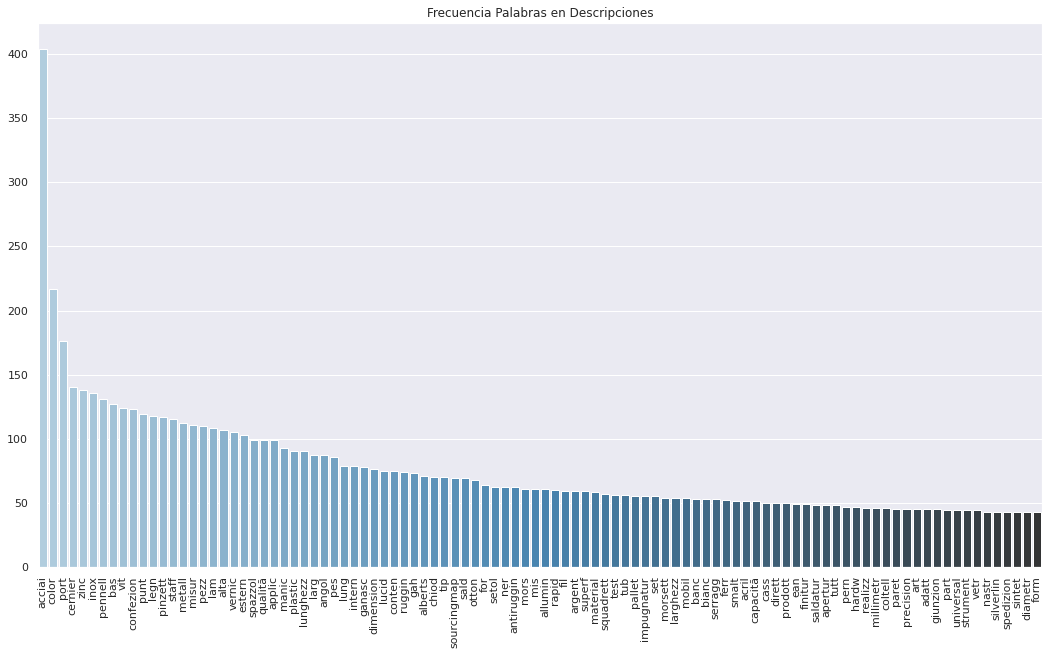

In [ ]:
#Graficamos la frecuencia de las palabras en las descripciones ya preprocesadas

all_tokens_description = [token for sublist in X_train.prepro_description for token in sublist]

from collections import Counter
freqs_description = Counter(all_tokens_description)

sorted_words_description  =  {k: v for k, v in sorted(freqs_description.items(), key=lambda item: item[1], reverse=True)}

top = 100
y = [float(y) for y in sorted_words_description.values()]
x = [x for x in sorted_words_description.keys()]

fig, ax = plt.subplots(figsize=(18,10),nrows=1)
p1 = sns.barplot(x=x[:top],y=y[:top],palette="Blues_d",ax=ax)
ax.set_title('Frecuencia Palabras en Descripciones')
plt.subplots_adjust(hspace=1.5)
plt.setp(p1.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
#Sacamos las columnas preprocesadas del dataframe
X_train = X_train.drop(columns=['prepro_title'])
X_train = X_train.drop(columns=['prepro_description'])

In [ ]:
#Como acciai aparece muchas veces en las palabras la agregamos a las stopwords ya que no aporta informacion relevante

italian_stopwords = stopwords.words('italian')+['acciai'] 


##Procesamiento de Texto para el modelo

In [ ]:
#Creamos una matriz sparse con los datos numericos de las imagenes para cada fila
#en el conjunto de entrenamiento, esto es con el fin de agregarlo a la matriz sparse
#obtenida cuando el procese el texto de cada objeto

#Cada Fila de esta matriz representa a un objeto en particular
from scipy import sparse
valores_train_numericos = X_train.drop(['title','description','image'],axis= 1)
valores_train_numericos_matriz = valores_train_numericos.to_numpy()
valores_train_s = sparse.csr_matrix(valores_train_numericos_matriz)
valores_train_s

<1893x256 sparse matrix of type '<class 'numpy.float64'>'
	with 248085 stored elements in Compressed Sparse Row format>

In [ ]:
#Creacion de CountVectorizer y concatenacion de texto y valores numericos para el entrenamiento
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import coo_matrix, hstack

#Vectorizer permite "vectorizar" los textos que se le entreguen
#Cuenta la cantidad de veces que aparece una palabra en el texto y crea una matriz sparse
vectorizer = CountVectorizer(stop_words=italian_stopwords, max_df=0.3, max_features= 10000, min_df=15,
                              binary=False, ngram_range=(1, 2),tokenizer=my_pre_processer) 

#max_df -> Si una palabra aparece en más del 30% de los textos entregados, no la cuenta

#min_df -> Si una palabra aparece en menos de 15 textos, no la cuenta

#stop_words -> Omite las palabras en la lista de italian_stopwords

#binary -> No considera datos binarios, es decir, no son 0 y 1 los que considera

#ngram_range -> Genera a lo más ngramas de 2 palabras, si fuera (1,1), genera solo ngrama de 1 palabra

#tokenizer -> Utilizar el preprocesador de antes




#Vectorizamos el titulo y la descripcion juntos, cada fila de la matriz sparse obtenida representa a un objeto
binary_train_pre = vectorizer.fit_transform(X_train['title']+X_train['description'])


#concatenamos la matriz obtenida por el texto con la de los valores numericos
binary_train = hstack([binary_train_pre,valores_train_s]) 

binary_train

<1893x723 sparse matrix of type '<class 'numpy.float64'>'
	with 264572 stored elements in COOrdinate format>

In [ ]:
#Dividimos el conjunto de test en uno de validación y testeo  

x_val, x_test, y_val, y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=3) 



In [ ]:
#Se repite el proceso para obtener los valores numericos para los datos de validación
from scipy import sparse
valores_val_numericos = x_val.drop(['title','description','image'],axis= 1)
valores_val_numericos_matriz = valores_val_numericos.to_numpy()
valores_val_s = sparse.csr_matrix(valores_val_numericos_matriz)
valores_val_s

<315x256 sparse matrix of type '<class 'numpy.float64'>'
	with 41216 stored elements in Compressed Sparse Row format>

In [ ]:
#Concatenacion de texto y valores numericos para la validacion
binary_val_pre = vectorizer.transform(x_val['title']+x_val['description']) # datos de validacion
binary_val = hstack([binary_val_pre, valores_val_s])
binary_val

<315x723 sparse matrix of type '<class 'numpy.float64'>'
	with 43827 stored elements in COOrdinate format>

In [ ]:
#Se repite el proceso para obtener los valores numericos para los datos de testeo
from scipy import sparse
valores_test_numericos = x_test.drop(['title','description','image'],axis= 1)
valores_test_numericos_matriz = valores_test_numericos.to_numpy()
valores_test_s = sparse.csr_matrix(valores_test_numericos_matriz)
valores_test_s

<316x256 sparse matrix of type '<class 'numpy.float64'>'
	with 41354 stored elements in Compressed Sparse Row format>

In [ ]:
# Concatenacion de texto y valores numericos para el test
binary_test_pre = vectorizer.transform(x_test['title']+x_test['description']) # datos de validacion
binary_test = hstack([binary_test_pre, valores_test_s])
binary_test

<316x723 sparse matrix of type '<class 'numpy.float64'>'
	with 44181 stored elements in COOrdinate format>

In [ ]:
#Vemos las dimensiones de los datos de validación y testeo
print("\nX,y Train Shapes:", binary_train.shape, Y_train.shape)
print("X,y Val Shapes:", binary_val.shape, y_val.shape)
print("X,y Test Shapes:", binary_test.shape, y_test.shape)


X,y Train Shapes: (1893, 723) (1893,)
X,y Val Shapes: (315, 723) (315,)
X,y Test Shapes: (316, 723) (316,)


In [ ]:
#Veamos los feature
print(len(vectorizer.get_feature_names()))

467


In [ ]:
#Cantidad de n-gramas de largo mayor a 1
cont = 0
for feature in vectorizer.get_feature_names():
    if ( len(feature.split(' ')) > 1 ):
         cont+= 1

print(cont)

136


Debido a la naturaleza del problema, veremos dos modelos, el Multinomial Naive Bayes, y el Regresor Logístico

##Naive Bayes

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import MultinomialNB #importamos Multinomial Naive Bayes
multi_nb = MultinomialNB().fit(binary_train, Y_train) #lo ajustamos

In [ ]:
predictions_1 = multi_nb.predict(binary_test)
print(classification_report(y_test, predictions_1)) 

#Classification report entrega un score por cada predicción, en particular, muestra el f1-score obtenido para el modelo

                        precision    recall  f1-score   support

_@accessori_saldatore_       0.67      0.89      0.76         9
      _@bancale_cargo_       1.00      1.00      1.00        12
  _@cazzuola_frattone_       0.78      0.78      0.78         9
  _@cerniera_bandella_       0.95      0.90      0.93        42
       _@chiavistello_       0.62      0.71      0.67         7
     _@chiodo_rivetto_       0.95      0.95      0.95        19
            _@collare_       1.00      0.95      0.98        22
           _@coltello_       1.00      0.91      0.95        11
         _@estrattore_       0.76      0.93      0.84        14
 _@morsetto_strettoio_       1.00      1.00      1.00        18
           _@pennello_       0.79      0.79      0.79        14
           _@pinzetta_       0.95      0.83      0.88        23
 _@spatola_raschietto_       0.92      0.69      0.79        16
           _@spazzola_       0.85      1.00      0.92        23
  _@staffa_squadretta_       0.94      

In [ ]:
#Buscamos hiperparametros para el modelo de Multinomial Naive Bayes
param_grid={"alpha":np.linspace(-3,0.1,10)}
multi_nb_1 = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

#Ajustamos el modelo
multi_nb_1.fit(binary_train, Y_train) 
 
# Mostramos los mejores parametros encontrados
print(multi_nb_1.best_params_) 
multi_nb_1_pred = multi_nb_1.predict(binary_test) 
   
#Mostramos resultados de la prediccion
print(classification_report(y_test, multi_nb_1_pred)) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


{'alpha': 0.1}
                        precision    recall  f1-score   support

_@accessori_saldatore_       0.80      0.89      0.84         9
      _@bancale_cargo_       0.92      1.00      0.96        12
  _@cazzuola_frattone_       0.73      0.89      0.80         9
  _@cerniera_bandella_       0.97      0.90      0.94        42
       _@chiavistello_       0.55      0.86      0.67         7
     _@chiodo_rivetto_       0.95      0.95      0.95        19
            _@collare_       1.00      0.95      0.98        22
           _@coltello_       1.00      0.91      0.95        11
         _@estrattore_       0.76      0.93      0.84        14
 _@morsetto_strettoio_       1.00      1.00      1.00        18
           _@pennello_       0.85      0.79      0.81        14
           _@pinzetta_       0.95      0.83      0.88        23
 _@spatola_raschietto_       0.86      0.75      0.80        16
           _@spazzola_       0.88      0.96      0.92        23
  _@staffa_squadretta_  

In [ ]:
s_train = multi_nb_1.score(binary_train, Y_train) #Error de entrenamiento
print("Score Train: ", s_train)

Score Train:  0.9540412044374009


In [ ]:
from sklearn.metrics import roc_auc_score #Score ROC

y_pred = multi_nb_1.predict_proba(binary_val)
rocscore = roc_auc_score(y_val, y_pred, average='macro',multi_class='ovr')
print("AUROC: ", rocscore)

AUROC:  0.9951055533906448


##Regresion Logistica 

In [ ]:
from sklearn.linear_model import LogisticRegression #Importamos la Regresion Logistica

In [ ]:
#Probamos la regresion logistica con parametros default
logreg = LogisticRegression()
logreg.fit(binary_train,Y_train) #Ajustamos
predictions_2 = logreg.predict(binary_test)
print(classification_report(y_test, predictions_2))  #Resultados de la prediccion

                        precision    recall  f1-score   support

_@accessori_saldatore_       0.90      1.00      0.95         9
      _@bancale_cargo_       1.00      1.00      1.00        12
  _@cazzuola_frattone_       0.89      0.89      0.89         9
  _@cerniera_bandella_       0.97      0.88      0.93        42
       _@chiavistello_       0.71      0.71      0.71         7
     _@chiodo_rivetto_       0.95      0.95      0.95        19
            _@collare_       1.00      1.00      1.00        22
           _@coltello_       1.00      0.91      0.95        11
         _@estrattore_       1.00      0.93      0.96        14
 _@morsetto_strettoio_       1.00      1.00      1.00        18
           _@pennello_       0.93      1.00      0.97        14
           _@pinzetta_       1.00      0.91      0.95        23
 _@spatola_raschietto_       0.84      1.00      0.91        16
           _@spazzola_       0.96      0.96      0.96        23
  _@staffa_squadretta_       0.90      

In [ ]:
#Buscamos hiperparametros para el modelo de Regresion Logistica
param_grid={"C":np.linspace(-3,0.1,10), "penalty":["l1","l2"], "dual":[True,False],
            "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], "multi_class":['auto', 'ovr', 'multinomial'], "max_iter":[100,150,200]}
   
logreg_2 = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
#Ajustamos el modelo
logreg_2.fit(binary_train, Y_train) 
 
# Mostramos los mejores parametros encontrados
print(logreg_2.best_params_) 
logreg_pred_2 = logreg_2.predict(binary_test) 
   
#Mostramos resultados de la prediccion
print(classification_report(y_test, logreg_pred_2)) 

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 6652 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 8750 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 8982 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:  7.8min finished


{'C': 0.1, 'dual': True, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
                        precision    recall  f1-score   support

_@accessori_saldatore_       0.82      1.00      0.90         9
      _@bancale_cargo_       1.00      1.00      1.00        12
  _@cazzuola_frattone_       0.89      0.89      0.89         9
  _@cerniera_bandella_       1.00      0.93      0.96        42
       _@chiavistello_       0.71      0.71      0.71         7
     _@chiodo_rivetto_       0.95      0.95      0.95        19
            _@collare_       1.00      1.00      1.00        22
           _@coltello_       1.00      0.91      0.95        11
         _@estrattore_       1.00      1.00      1.00        14
 _@morsetto_strettoio_       1.00      1.00      1.00        18
           _@pennello_       0.93      0.93      0.93        14
           _@pinzetta_       1.00      0.87      0.93        23
 _@spatola_raschietto_       0.89      1.00      0.94        1

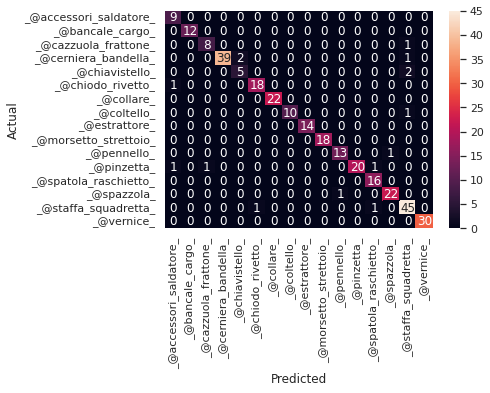

In [ ]:
#Vemos la matriz de confusion para el modelo con los mejores hiperparametros
from sklearn.metrics import confusion_matrix
import seaborn as sn
data_cf = {'y_Actual':    y_test,
        'y_Predicted': logreg_pred_2
        }

df_cf = pd.DataFrame(data_cf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cf['y_Actual'], df_cf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score #Score ROC

y_pred = logreg_2.predict_proba(binary_val)
rocscore = roc_auc_score(y_val, y_pred, average='macro',multi_class='ovr')
print("AUROC: ", rocscore)

AUROC:  0.9961902576305448


In [ ]:
s_train = logreg_2.score(binary_train, Y_train) #Error de entrenamiento
print("Score Train: ", s_train)

Score Train:  0.9778129952456418


Conclusión: Basandose en los resultados de errores, resulta óptimo utilizar la regresión logística para predecir.

##Test y predicción

In [ ]:
'''if (colab_flag):
    !echo $path
    !unzip $path/ferramenta_competition_test_without_labels.zip'''

/content/drive/MyDrive/Dataset
unzip:  cannot find or open /content/drive/MyDrive/Dataset/ferramenta_competition_test_without_labels.zip, /content/drive/MyDrive/Dataset/ferramenta_competition_test_without_labels.zip.zip or /content/drive/MyDrive/Dataset/ferramenta_competition_test_without_labels.zip.ZIP.


In [ ]:
# cargar .csv de testeo
'''if (colab_flag):
    data_test = pd.read_csv("ferramenta_competition_test_without_labels.csv", encoding='latin-1')'''

data_test = pd.read_csv(os.path.join('ferramenta_competition_test_without_labels.csv'))
data_test.head()

,image,title,description,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,...,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255
0,193298868.jpg,durlach magnat plus morsa da banco con mds 160...,durlach magnat plus morsa da banco con mds 160...,0.084366,0.132483,0.000000,0.616159,0.0,0.358702,0.033038,0.00000,0.680323,0.0,0.000000,0.000000,0.0,0.0,0.0,0.428513,0.0,0.436265,0.950636,0.000000,0.228387,0.000000,0.189353,0.434081,0.571047,0.000000,0.421557,0.335947,0.0,0.000000,0.337944,0.0,0.0,0.000000,0.666920,0.000000,0.0,...,0.071825,0.000000,0.000000,0.0,0.793235,1.045893,0.00000,0.0,0.434586,0.855759,0.000000,0.532302,0.0,0.0,0.693572,0.000000,1.384848,0.0,0.0,0.113462,0.000000,0.000000,0.669779,0.399739,0.223165,0.006210,0.150291,0.647014,0.460184,0.476443,0.249871,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.258719,0.000000
1,180043630.jpg,sicutool morse da banco universali e per insta...,largh. ganasce mm 160 apertura mm 225 alt. fr...,0.000000,0.000000,0.198770,0.908536,0.0,0.123547,0.000000,0.00000,0.872002,0.0,0.000000,0.686689,0.0,0.0,0.0,0.168953,0.0,0.444685,1.089771,0.092668,0.255528,0.000000,0.734944,0.100475,0.658690,0.000000,0.616996,1.311054,0.0,0.415126,0.024407,0.0,0.0,0.000000,1.412179,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.920062,0.490969,0.00000,0.0,0.371266,0.822199,0.000000,0.580381,0.0,0.0,0.958482,0.106509,1.488676,0.0,0.0,0.000000,0.369259,0.000000,0.782168,0.590222,0.572960,0.124556,0.114640,0.842181,1.212312,0.000000,0.337951,0.0,0.0,0.0,0.195993,0.0,0.00000,0.003187,0.147880,0.148991
2,180043573.jpg,sicutool morse da banco 2854 80,largh. ganasce mm 80 apertura max mm 105 peso...,0.011956,0.000000,0.000000,0.457699,0.0,0.141502,0.000000,0.12656,0.469594,0.0,0.037151,0.237810,0.0,0.0,0.0,0.517180,0.0,0.598957,1.039781,0.054868,0.112358,0.070034,0.553029,0.132452,0.310749,0.000000,0.358245,0.817564,0.0,0.000000,0.092601,0.0,0.0,0.000000,1.295072,0.049519,0.0,...,0.223524,0.000000,0.295137,0.0,0.481772,1.108684,0.00000,0.0,0.450969,0.611103,0.000000,0.461462,0.0,0.0,0.433281,0.145672,1.010143,0.0,0.0,0.000000,0.000000,0.199509,0.624773,0.560047,0.340297,0.268552,0.000000,0.497321,0.444462,0.000000,0.388767,0.0,0.0,0.0,0.000000,0.0,0.00000,0.084646,0.000000,0.129974
3,199501868.jpg,cassa sovrapponibile norma europa 130 lt base ...,contenitori sovrapponibili norma europa realiz...,0.174531,0.123338,0.005443,0.593127,0.0,0.036032,0.378701,0.00000,0.416917,0.0,0.000000,0.000000,0.0,0.0,0.0,0.746301,0.0,0.329824,1.170303,0.000000,0.157979,0.426727,0.476844,0.275922,0.676764,0.014501,1.076584,0.211804,0.0,0.154316,0.000000,0.0,0.0,0.000000,1.116516,0.156692,0.0,...,0.276788,0.069651,0.000000,0.0,0.351217,0.646533,0.02538,0.0,0.577320,0.568385,0.000000,0.815473,0.0,0.0,0.996224,0.303338,0.880762,0.0,0.0,0.075085,0.148517,0.000000,0.383728,0.005046,0.000000,0.000000,0.000000,0.754065,0.124804,0.094594,0.000000,0.0,0.0,0.0,0.000000,0.0,0.17182,0.000000,0.000000,0.000000
4,147033432.jpg,stanley set di pennelli per decorare 5 pz. 0 2...,stanley set di pennelli per decorare 5 pz. 0 2...,0.350889,0.000000,0.000000,0.721987,0.0,0.254078,0.299150,0.00000,0.131891,0.0,0.000000,0.089366,0.0,0.0,0.0,0.491465,0.0,0.416190,0.983460,0.000000,0.241045,0.234922,0.345215,0.031265,0.276657,0.000000,0.466795,0.038548,0.0,0.105662,0.399373,0.0,0.0,0.053702,0.665270,0.000000,0.0,...,0.699652,0.000000,0.000000,0.0,0.702536,0.869420,0.00000,0.0,0.524548,0.728517,0.059257,0.482354,0.0,0.0,0.542604,0.501970,1.192820,0.0,0.0,0.000000,0.000000,0.043585,0.422025,0.216872,0.230652,0.304099,0.000000,0.400090,0.977819,0.000000,0.445638,0.0,0.0,0.0,0.000000,0.0,0.00565,0.000000,0.030347,0.000000


In [ ]:
#Se repite el mismo procedimiento realizado anteriormente para predecir
valores_numericos = data_test.drop(['title','description','image'],axis= 1)
valores_numericos_matriz = valores_numericos.to_numpy()
valores_send = sparse.csr_matrix(valores_numericos_matriz)
valores_send

<1683x256 sparse matrix of type '<class 'numpy.float64'>'
	with 220264 stored elements in Compressed Sparse Row format>

In [ ]:
#Concatenamos texto y valores numericos
binary_send_pre = vectorizer.transform(data_test['title']+data_test['description']) 
binary_send = hstack([binary_send_pre, valores_send])
binary_send

<1683x723 sparse matrix of type '<class 'numpy.float64'>'
	with 234997 stored elements in COOrdinate format>

In [ ]:
y_pred = logreg_2.predict(binary_send) #Predecimos

In [ ]:
#Convertimos a dataframe las predicciones obtenidas
df = data_test
df['class'] = y_pred
df = df.set_index('image')
df = df.loc[:, df.columns.intersection(['class'])]
df.head()

,class
image,
193298868.jpg,_@morsetto_strettoio_
180043630.jpg,_@morsetto_strettoio_
180043573.jpg,_@morsetto_strettoio_
199501868.jpg,_@bancale_cargo_
147033432.jpg,_@pennello_


In [ ]:
df.to_csv('predicciones.csv') #Convertimos a csv